In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
master = pd.read_csv("../data/master/studytime.csv")

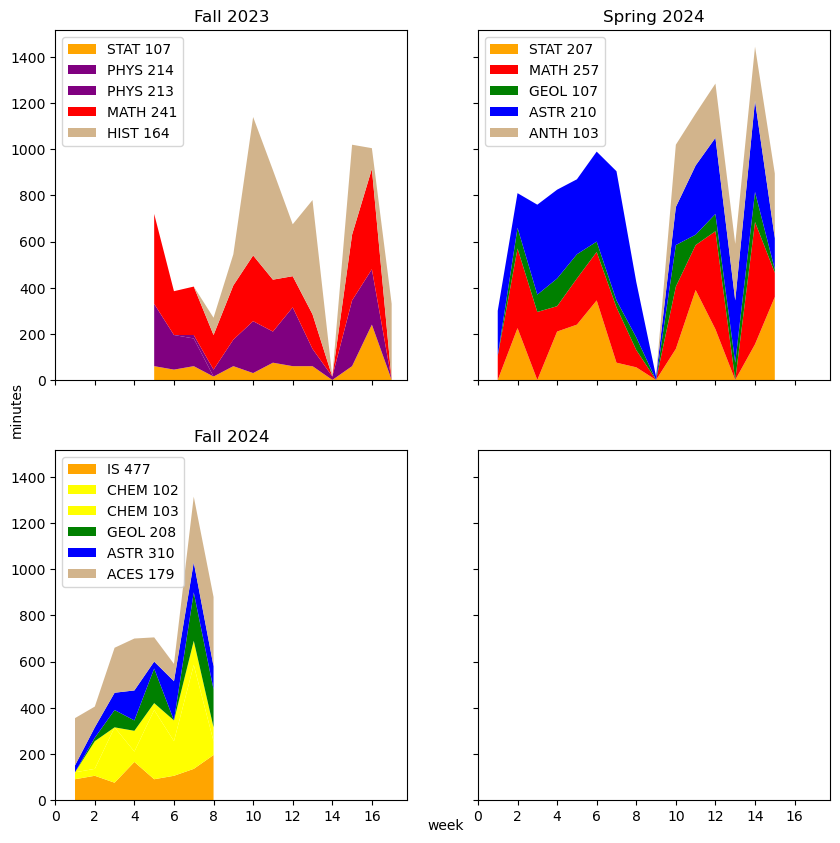

In [6]:
fig, ax = plt.subplots(2,2, figsize=[10,10], sharey=True, sharex=True)
fa23 = master[master["term"] == "fa23"].pivot(index=['term', "week", 'day of week'], columns='class', values='time spent (min)')
df1 = fa23.groupby(['week']).agg('sum')[["STAT 107", "PHYS 214", "PHYS 213", "MATH 241", "HIST 164"]]

ax[0,0].stackplot(df1.index, [df1[col] for col in df1.columns], labels=df1.columns, colors=['orange', 'purple', 'purple', 'red', 'tan'])
ax[0,0].legend(df1.columns, loc='upper left')

sp24 = master[master["term"] == "sp24"].pivot(index=['term', "week", 'day of week'], columns='class', values='time spent (min)')
df1 = sp24.groupby(['week']).agg('sum')[[ "STAT 207","MATH 257", "GEOL 107", "ASTR 210", "ANTH 103"]]

ax[0,1].stackplot(df1.index, [df1[col] for col in df1.columns], labels=df1.columns, colors=['orange', 'red', 'green', 'blue', 'tan'])
ax[0,1].legend(df1.columns, loc='upper left')

fa24 = master[master["term"] == "fa24"].pivot(index=['term', "week", 'day of week'], columns='class', values='time spent (min)')
df1 = fa24.groupby(['week']).agg('sum')[[ "IS 477", "CHEM 102", "CHEM 103", "GEOL 208", "ASTR 310", "ACES 179"]]

ax[1,0].stackplot(df1.index, [df1[col] for col in df1.columns], labels=df1.columns, colors=['orange', 'yellow', 'yellow', 'green', 'blue', 'tan'])
ax[1,0].legend(df1.columns, loc='upper left')

fig.text(0.08, 0.5, 'minutes', va='center', rotation='vertical')
fig.text(0.515, 0.08, 'week', ha='center', rotation='horizontal')
ax[0,0].set_title("Fall 2023")
ax[0,1].set_title("Spring 2024")
ax[1,0].set_title("Fall 2024")
fig.align_xlabels()
ax[0,0].set_xticks(list(range(0,17,2)))
fig.savefig('../results/stackplot_by_class.png')

In [4]:
ds_group = ['STAT 107', 'STAT 207', 'IS 477']
astro_group = ['ASTR 210', 'ASTR 310']
gened_group = ['HIST 164', 'ANTH 103', 'ACES 179']
geol_group = ['GEOL 107', 'GEOL 208']
stem_foundations = ['MATH 241', 'MATH 257', 'PHYS 213', 'PHYS 214', 'CHEM 102', 'CHEM 103']

def find_group(course: str):
    if course in ds_group:
        return 'ds'
    elif course in astro_group:
        return 'astro'
    elif course in gened_group:
        return 'gened'
    elif course in geol_group:
        return 'geol'
    elif course in stem_foundations:
        return 'stem_foundations'
    else:
        return 'other'

master['group'] = master['class'].apply(lambda x: find_group(x))
df_groups = master.groupby(['term', 'week', 'day of week', 'group']).agg('sum')[['time spent (min)']].reset_index()

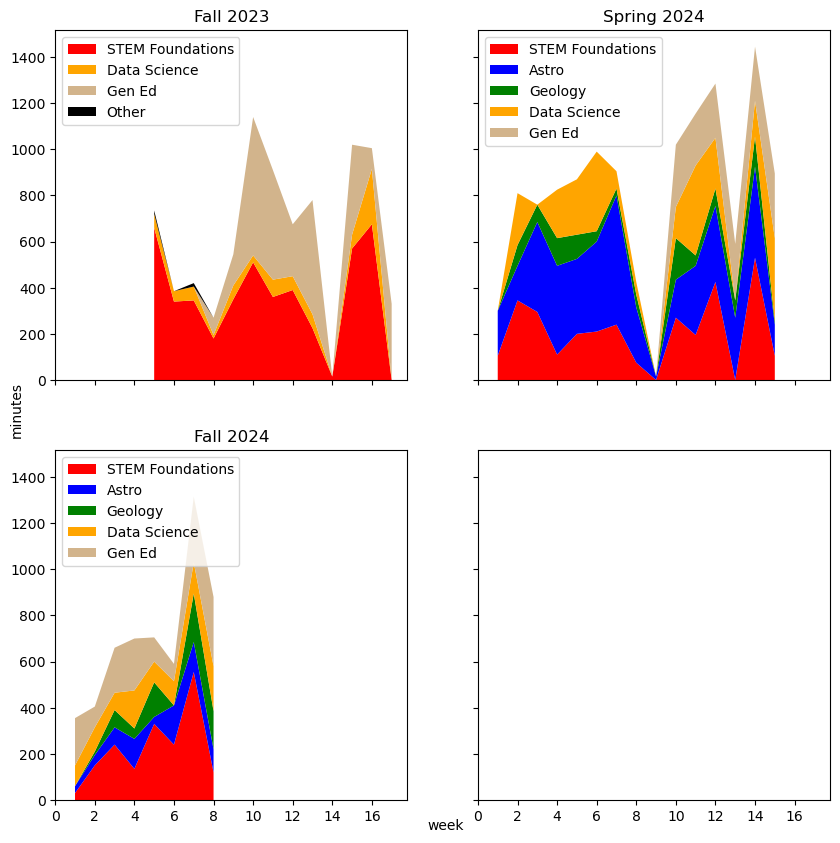

In [8]:
fig2, ax2 = plt.subplots(2,2, figsize=[10,10], sharey=True, sharex=True)

fa23 = df_groups[df_groups["term"] == "fa23"].pivot(index=['term', "week", 'day of week'], columns='group', values='time spent (min)')
df1 = fa23.groupby(['week']).agg('sum')[['stem_foundations', 'ds', 'gened', 'other']]

ax2[0,0].stackplot(df1.index, [df1[col] for col in df1.columns], colors=['red', 'orange', 'tan', 'black'])
ax2[0,0].legend(labels=["STEM Foundations", "Data Science", "Gen Ed", "Other"], loc='upper left')

sp24 = df_groups[df_groups["term"] == "sp24"].pivot(index=['term', "week", 'day of week'], columns='group', values='time spent (min)')
df1 = sp24.groupby(['week']).agg('sum')[['stem_foundations', 'astro', 'geol', 'ds', 'gened']]

ax2[0,1].stackplot(df1.index, [df1[col] for col in df1.columns], colors=['red', 'blue', 'green', 'orange', 'tan'])
ax2[0,1].legend(labels=["STEM Foundations", "Astro", "Geology", "Data Science", "Gen Ed"], loc='upper left')

fa24 = df_groups[df_groups["term"] == "fa24"].pivot(index=['term', "week", 'day of week'], columns='group', values='time spent (min)')
df1 = fa24.groupby(['week']).agg('sum')[['stem_foundations', 'astro', 'geol', 'ds', 'gened']]

ax2[1,0].stackplot(df1.index, [df1[col] for col in df1.columns], colors=['red', 'blue', 'green', 'orange', 'tan'])
ax2[1,0].legend(labels=["STEM Foundations", "Astro", "Geology", "Data Science", "Gen Ed"], loc='upper left')

fig2.text(0.08, 0.5, 'minutes', va='center', rotation='vertical')
fig2.text(0.515, 0.08, 'week', ha='center', rotation='horizontal')
ax2[0,0].set_title("Fall 2023")
ax2[0,1].set_title("Spring 2024")
ax2[1,0].set_title("Fall 2024")
fig2.align_xlabels()
ax2[0,0].set_xticks(list(range(0,17,2)))
fig2.savefig('../results/stackplot_by_group.png')